# Notebook - Linear Regression
## Load the dataset
The following code:
- imports all modules that will be used, and 
- loads the dataset from the saved file. 

The file path is mapped to 'file_location', which can be changed to use a different location

In [41]:
#import the modules to be used
import numpy as np
import pandas as pd 
import seaborn as sns 
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [42]:
#save the file path
file_location = "C:/Users/theja/OneDrive/Documents/student-mat.csv"
#import the data
scores_raw = pd.DataFrame(pd.read_csv(file_location,sep=';'))
#show the top rows to check the import
scores_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Data dictionary:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)

## Pre-processing
### Cleaning data
The following code:
- Removes variables that are inappropriate for the analysis
- Converts binary catagorical variables to numeric form
- Converts multi-value catagorical variables to binary dummy numeric form
- Checks the variable types of all variables and changes any that are inappropriate.
- Checks for missing values 
- Checks for invalid values

In [43]:
#create the pre-processing dataset
scores_pre = pd.DataFrame(scores_raw)

#the school variable would be inapproriate to use as training on this would prevent the approach being generalisable.
#drop the school variable

scores_pre = scores_pre.drop(columns='school')

#a number of variables can be converted from character binary to numeric binary using a simple replacement
#the following dictionary shows the assignment of numeric replacements

convert_binary = {'sex':     {'F': 0, 'M': 1}
                ,'address': {'U': 0, 'R': 1}
                ,'famsize': {'LE3': 0, 'GT3':1}
                ,'Pstatus': {'T':0, 'A':1}
                ,'schoolsup': {'no': 0, 'yes': 1}
                ,'famsup': {'no': 0, 'yes': 1}
                ,'paid': {'no': 0, 'yes': 1}
                ,'activities': {'no': 0, 'yes': 1}
                ,'nursery': {'no': 0, 'yes': 1}
                ,'higher': {'no': 0, 'yes': 1}
                ,'internet': {'no': 0, 'yes': 1}
                ,'romantic': {'no': 0, 'yes': 1}
                }
scores_pre = scores_pre.replace(convert_binary)


In [44]:
#the remaining nominal variables need to have dummy replacements created
nominal_vars = ["Mjob","Fjob","reason","guardian"]


for x in nominal_vars:
        dummies = pd.get_dummies(scores_pre[x], prefix=x, dummy_na=False)
        scores_pre = scores_pre.drop(x, 1)
        scores_pre = pd.concat([scores_pre, dummies], axis=1)

In [45]:
#check the values and columns have been corrected - they should now all be integers
scores_pre.columns

scores_pre.dtypes

sex                  int64
age                  int64
address              int64
famsize              int64
Pstatus              int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
schoolsup            int64
famsup               int64
paid                 int64
activities           int64
nursery              int64
higher               int64
internet             int64
romantic             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
F

In [46]:
#detect missing values for each variables
scores_pre.isnull().sum()

#there are no missing values 

sex                  0
age                  0
address              0
famsize              0
Pstatus              0
Medu                 0
Fedu                 0
traveltime           0
studytime            0
failures             0
schoolsup            0
famsup               0
paid                 0
activities           0
nursery              0
higher               0
internet             0
romantic             0
famrel               0
freetime             0
goout                0
Dalc                 0
Walc                 0
health               0
absences             0
G1                   0
G2                   0
G3                   0
Mjob_at_home         0
Mjob_health          0
Mjob_other           0
Mjob_services        0
Mjob_teacher         0
Fjob_at_home         0
Fjob_health          0
Fjob_other           0
Fjob_services        0
Fjob_teacher         0
reason_course        0
reason_home          0
reason_other         0
reason_reputation    0
guardian_father      0
guardian_mo

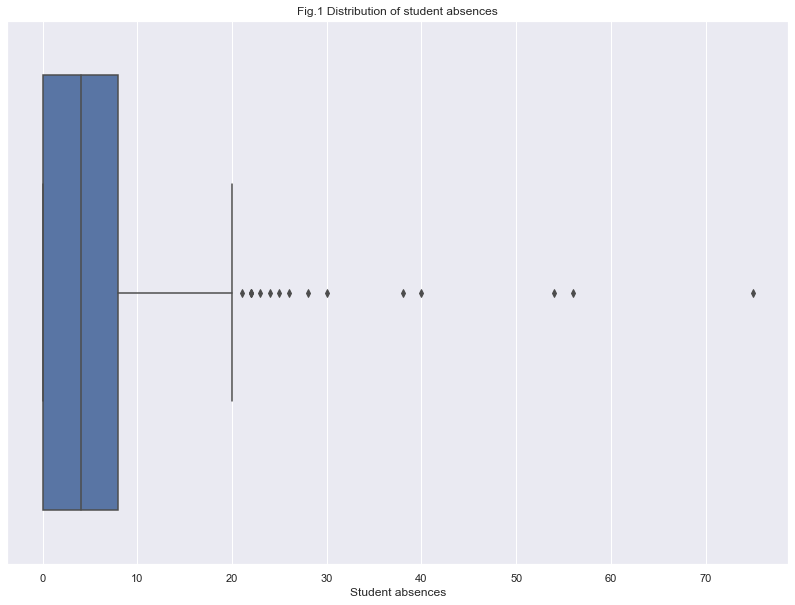

In [47]:
#for the non-catagorical numeric variables, we need to check for outliers. 
#he data is from an age-restricted school, so age was exempt from examination

#box plots for absences
fig1 = sns.boxplot(x="absences", data=scores_pre)
fig1.set_title("Fig.1 Distribution of student absences")
fig1.set(xlabel='Student absences', ylabel='')

plt.show()

The distribution of student absences in figure 1 shows a number of high outliers. While almost all students had fewer than 30 absences, there are some students who have more than this. To further investigate these outliers and to aid removal, a Z score will be calculated for all absence scores. This is a measure of how many standard deviations above or below the mean any specific data point its.

In [48]:
#Produce a dataset of the absences and their z-scores
absences=pd.DataFrame()
absences["scores"] = scores_pre["absences"]
absences["z_score"]=stats.zscore(absences["scores"])
#Display all z scores over or equal to 3
absences.loc[absences["z_score"].abs()>=3]


,scores,z_score
74,54,6.041710
183,56,6.291930
276,75,8.669022
280,30,3.039067
307,38,4.039948
315,40,4.290168


In [49]:
#there were 6 scores which had a z score of over 3,
#based on this it's safe to simply remove these outliers from the main data by removing the corresponding absence values

scores_pre = scores_pre[scores_pre.absences <30]

#show there are no absences more that 30 in the data now

scores_pre.loc[scores_pre["absences"]>=30]

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other


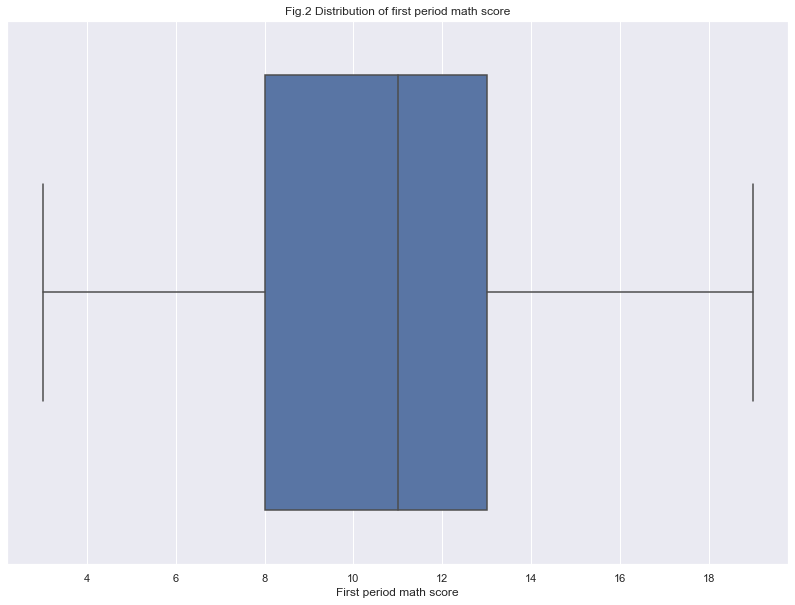

In [50]:
#box plots for first period score
fig2 = sns.boxplot(x="G1", data=scores_pre)
fig2.set_title("Fig.2 Distribution of first period math score")
fig2.set(xlabel='First period math score', ylabel='')

plt.show()

The first period math scores seen in figure 2 don't show any obvious outliers. This confirmed by the z-score check below. 

In [51]:
#Produce a dataset of the first score and their z-scores
first_scores=pd.DataFrame()
first_scores["scores"] = scores_pre["G1"]
first_scores["z_score"]=stats.zscore(first_scores["scores"])
#Display all z scores over or equal to 3
first_scores.loc[first_scores["z_score"].abs()>=3]

,scores,z_score


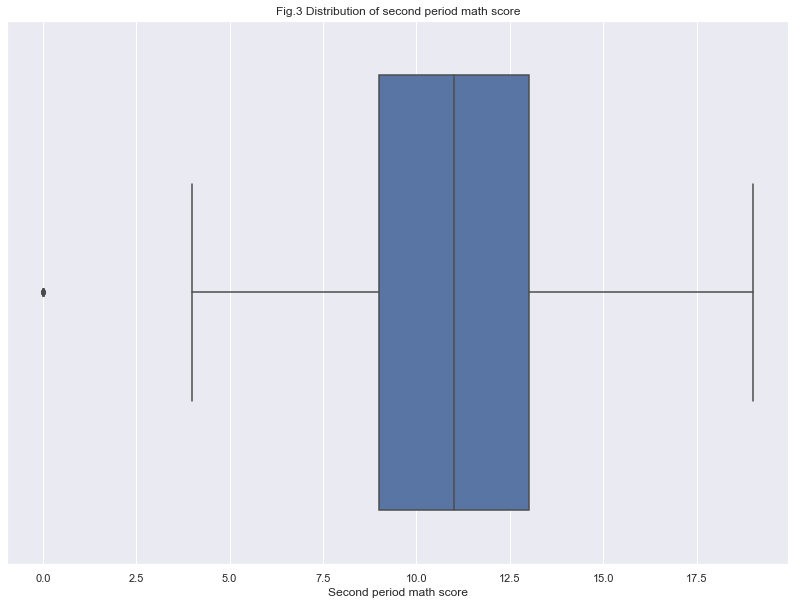

In [52]:
#box plots for second period score
fig3 = sns.boxplot(x="G2", data=scores_pre)
fig3.set_title("Fig.3 Distribution of second period math score")
fig3.set(xlabel='Second period math score', ylabel='')

plt.show()

It appears that there is one outlier in the second period math scores seen in figure 3. It's not that far outside the expect range however, and since it is safer to leave values in where possible, we can check if this values is outside the appropriate z-score range.

In [53]:
#Produce a dataset of the second scores and their z-scores
second_scores=pd.DataFrame()
second_scores["scores"] = scores_pre["G2"]
second_scores["z_score"]=stats.zscore(second_scores["scores"])
#Display all z scores over or equal to 3
second_scores.loc[second_scores["z_score"].abs()>=3]

,scores,z_score


Based on the lack of z-scores above 3, the decision was taken to leave in the possible outlier in second period math scores to retain as much of the data as possible.

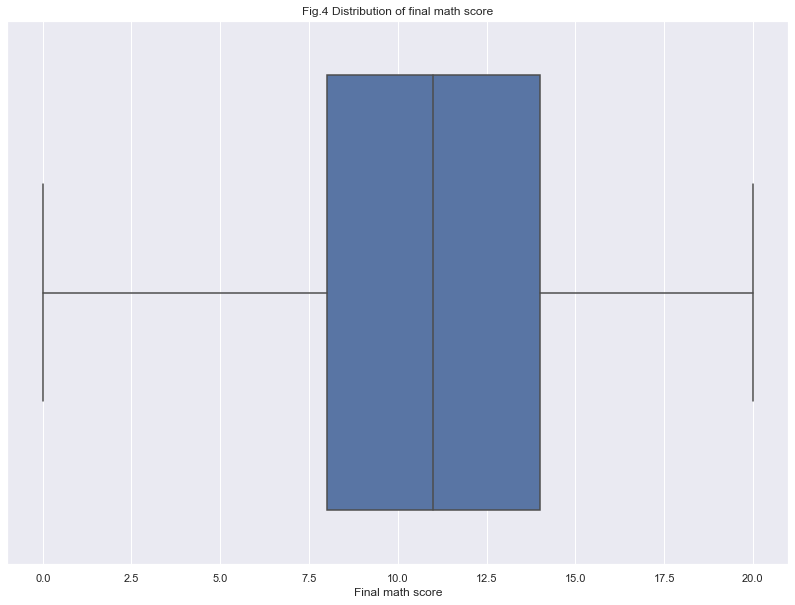

In [54]:
#box plots for first period score
fig4 = sns.boxplot(x="G3", data=scores_pre)
fig4.set_title("Fig.4 Distribution of final math score")
fig4.set(xlabel='Final math score', ylabel='')

plt.show()

Once again, there appeared to be no outliers in the final math score. The analysis of z-scores agrees with this, and no scores were removed.

In [55]:
#Produce a dataset of the final scores and their z-scores
final_scores=pd.DataFrame()
final_scores["scores"] = scores_pre["G3"]
final_scores["z_score"]=stats.zscore(final_scores["scores"])
#Display all z scores over or equal to 3
final_scores.loc[final_scores["z_score"].abs()>=3]

,scores,z_score


## Variable selection
There are a large number of variables in the dataset, some of which will be more useful in the model than others. For this reason, a correlation matrix was calculated for all variables in the data, represented in heatmap for in figure 5. Due to the large number of variables, the specific correlation values are not shown on this plot.

Text(0.5, 1, 'Fig.5 Correlation matrix of all variables')

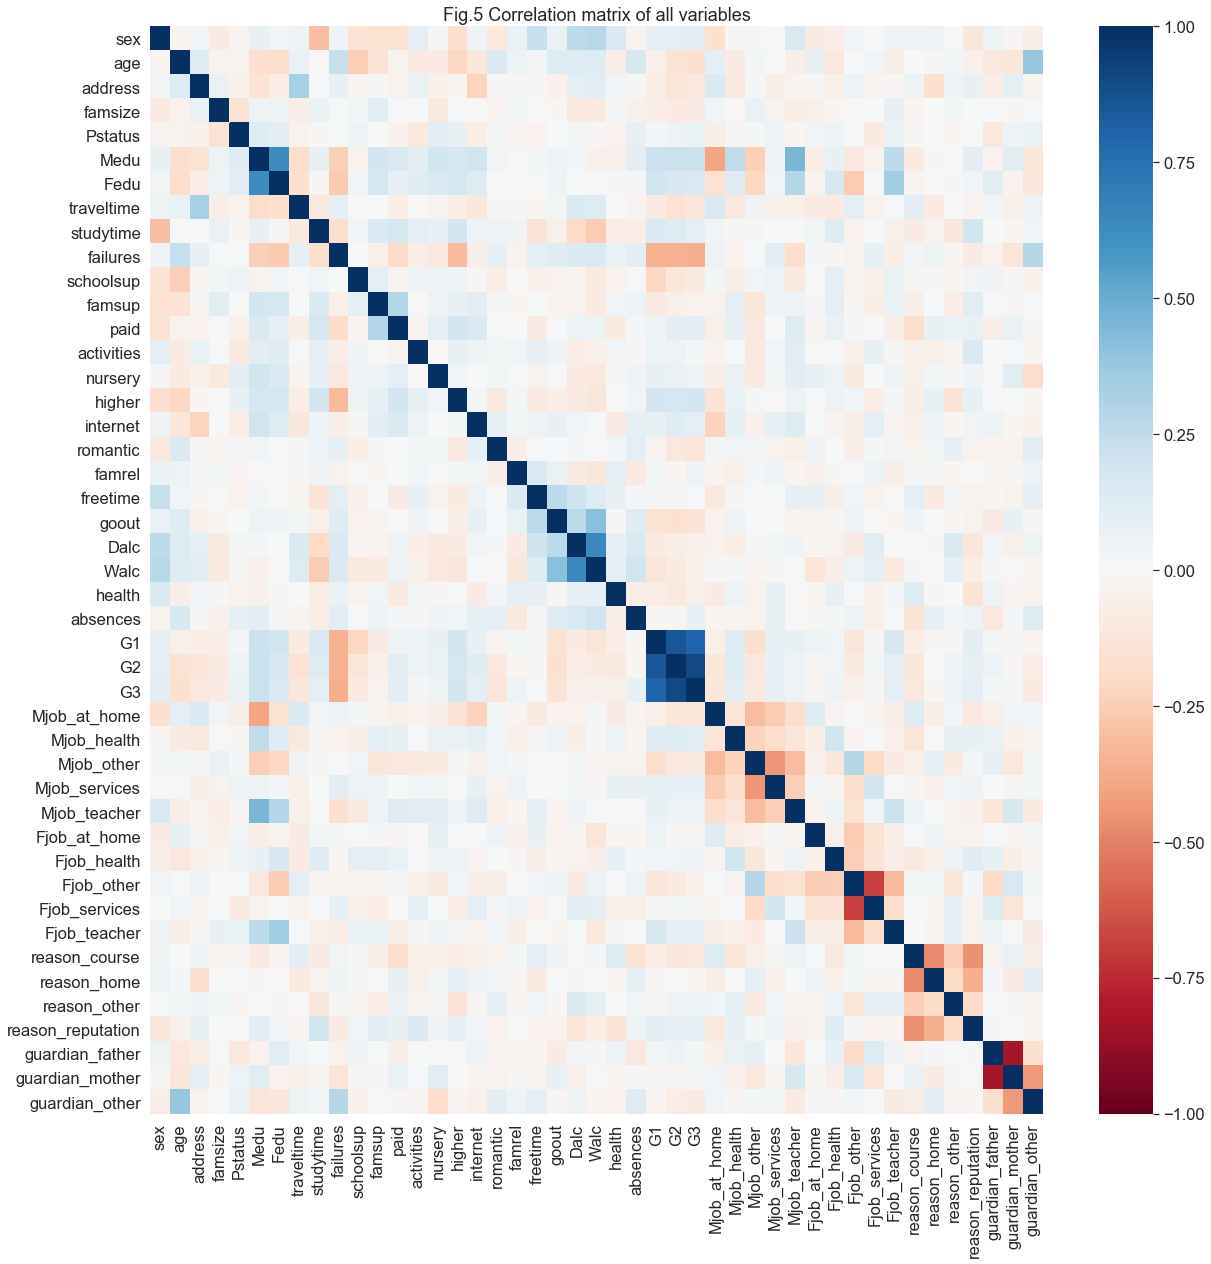

In [56]:
#create a correlation matrix
c_matrix = scores_pre.corr()
#set the figure and font size
sns.set(rc={'figure.figsize':(20,20)},font_scale=1.5)
#create a heatmap using the correlation matrix
fig5 = sns.heatmap(c_matrix,annot=False,vmin=-1,vmax=1,cmap='RdBu')
#set the figure title
fig5.set_title("Fig.5 Correlation matrix of all variables")


The most highly correlated variables were unsurprisingly the various math scores. The other most correlated variables are the mother and father's education, and the workday and weekend alcohol consumption. 

Many of the variables had extremly small (<1) correlation scores with the math scores that are the target of prediction. To simplify the dataset, all variables that had a correlation of <1 with the final math score will be removed from the dataset.

Text(0.5, 1, 'Fig.6 Correlation matrix of variables, where correlation with G3 greater than |0.1|')

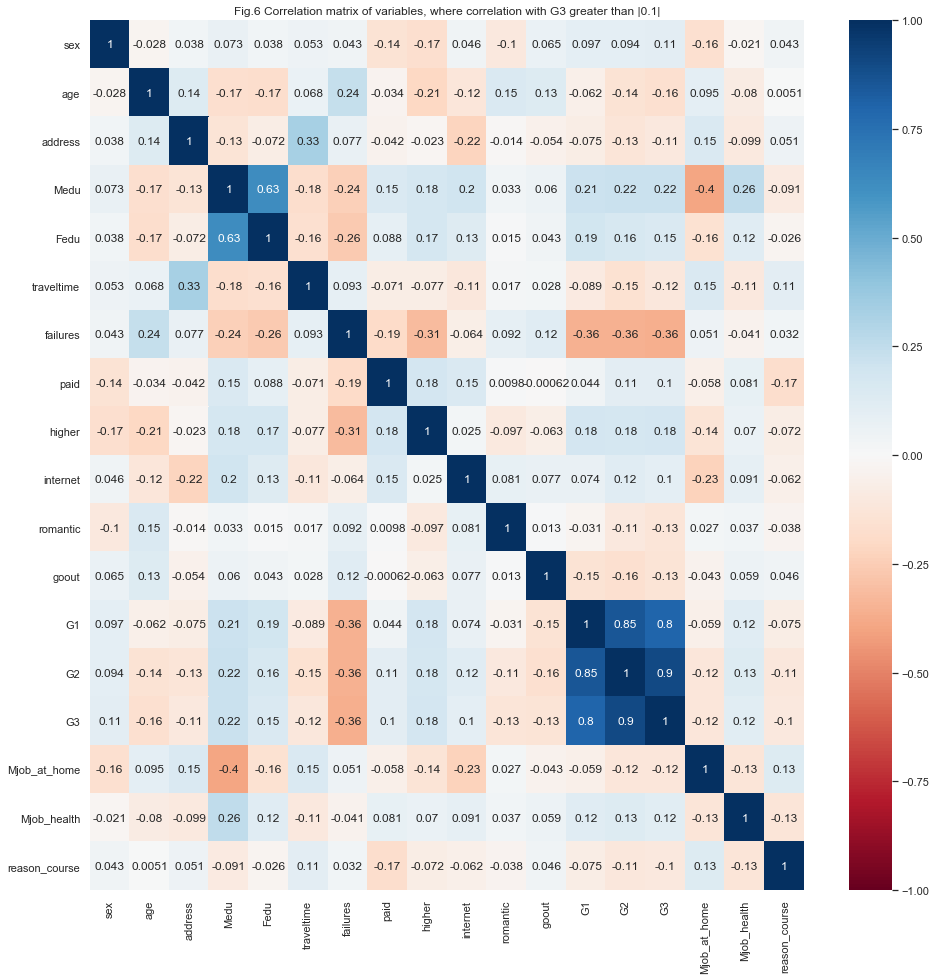

In [57]:
#create the range of values to drop - if the correlation is more that -0.1 but less than 0.1
drop_range = (c_matrix['G3'] <=0.1) & (c_matrix['G3'] >=-0.1)
#drop these values and create a new index
c_matrix_new = c_matrix.drop(c_matrix.loc[drop_range].index)
#create a new heatmap using these values only
in_range = c_matrix_new.index
#set the figure and font size
sns.set(rc={'figure.figsize':(16,16)})
#create a heatmap using the correlation matrix
fig6 = sns.heatmap(c_matrix_new[in_range],annot=True,vmin=-1,vmax=1,cmap='RdBu')
#set the figure title
fig6.set_title("Fig.6 Correlation matrix of variables, where correlation with G3 greater than |0.1|")


Text(0.5, 1, 'Fig.6 Correlation matrix of variables, where correlation with G3 greater than |0.1|')

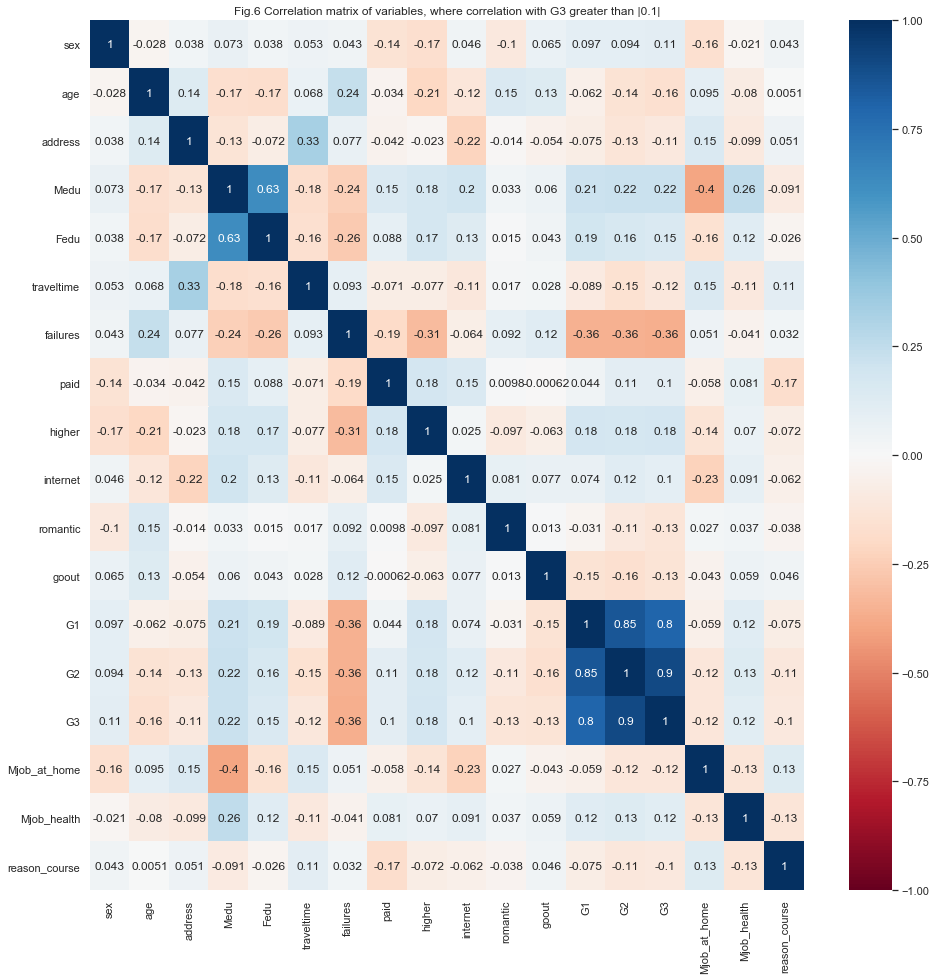

In [58]:
#create a new heatmap using these values only
in_range = c_matrix_new.index
#set the figure and font size
sns.set(rc={'figure.figsize':(16,16)})
#create a heatmap using the correlation matrix
fig6 = sns.heatmap(c_matrix_new[in_range],annot=True,vmin=-1,vmax=1,cmap='RdBu')
#set the figure title
fig6.set_title("Fig.6 Correlation matrix of variables, where correlation with G3 greater than |0.1|")

In [59]:
#finally, the dataset is ready for use when these variables are removed
scores_final = scores_pre.filter(in_range)
scores_final.head()

,sex,age,address,Medu,Fedu,traveltime,failures,paid,higher,internet,romantic,goout,G1,G2,G3,Mjob_at_home,Mjob_health,reason_course
0,0,18,0,4,4,2,0,0,1,0,0,4,5,6,6,1,0,1
1,0,17,0,1,1,1,0,0,1,1,0,3,5,5,6,1,0,1
2,0,15,0,1,1,1,3,1,1,1,0,2,7,8,10,1,0,0
3,0,15,0,4,2,1,0,1,1,1,1,2,15,14,15,0,1,0
4,0,16,0,3,3,1,0,1,1,0,0,2,6,10,10,0,0,0


Figure 6 shows the number of dimensions has been reduced to 17, plus the target variable. Two of these variables - G1 and G2 - correspond to math scores obtained during the year however, and models will be fit without these to obtain a more useful predictive capability. 

The variables to be used in the final model are:
- sex
- age
- address
- Medu
- Fedu
- traveltime
- failures
- paid
- higher
- internet
- romantic
- goout
- Mjob_at_home 
- Mjob_health
- reason_course and,
- a target variable of G3 (final math score).

The data will be normalised, but this will be build in as part of the model production pipeline for ease of use. 

### PCA
A seperate dataset will be derived using principal component analysis to see if the performance of the linear regression can be improved.

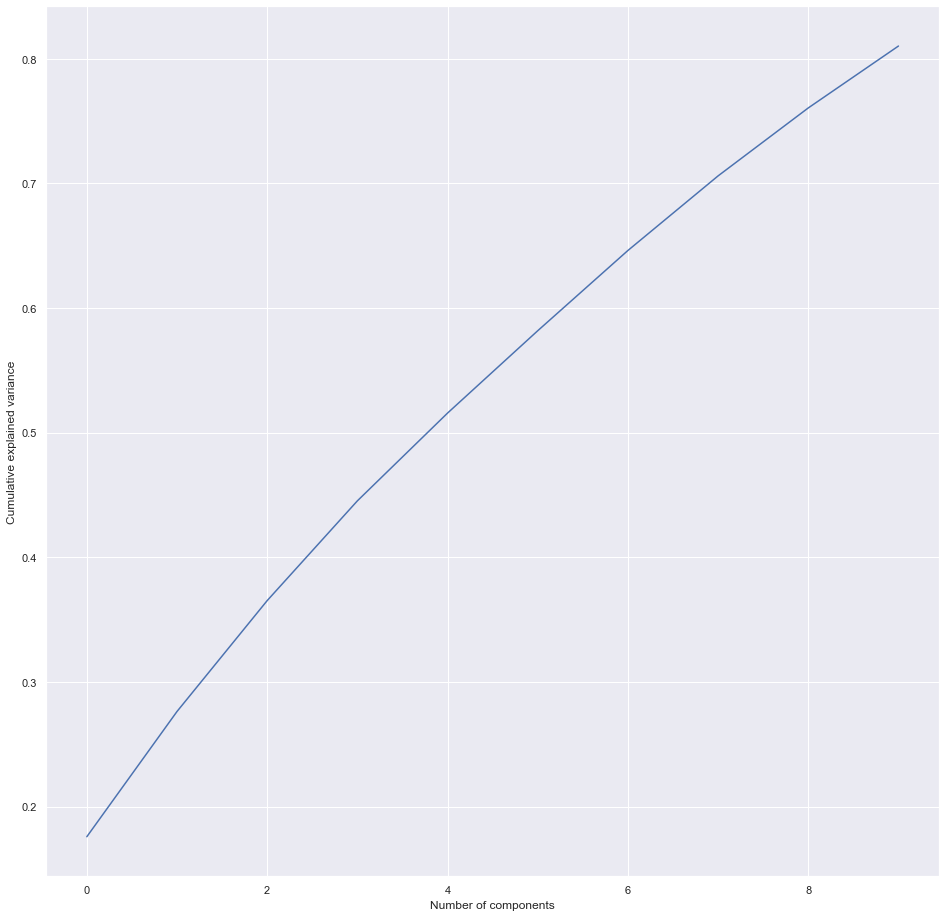

In [60]:
#create the dataset for PCA
X = scores_final.drop(columns=['G1','G2','G3'])
y = scores_final['G3']
#scale the data
X = StandardScaler().fit_transform(X)
#run the PCA fitting
pca_fitted =pca.fit(X)
#plot the cumulative variance explained
plt.plot(np.cumsum(pca_fitted.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [61]:
#based on this, we will use 10 components to transform the feature dataset
pca = PCA(n_components=10)
X_PCA = pca.fit_transform(X)

## Data modelling
### Test and training data split
The first step of modelling is to split the data into a test and a training set. I will first to this excluding the math scores G1 and G2, and only revist these scores if accurate prediction without them is impossible.

In [62]:
#create the dataset for splitting
X = scores_final.drop(columns=['G1','G2','G3'])
y = scores_final['G3']
#set the number of folds we will use in k-fold cross validation splitting
folds = 5
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(1/folds), random_state=88)
#print the shape of the test and training sets
print('Training dataset: X_train=', X_train.shape, ', y_train', y_train.shape)
print('Testing dataset: X_test=', X_test.shape, ', y_test', y_test.shape)

Training dataset: X_train= (311, 15) , y_train (311,)
Testing dataset: X_test= (78, 15) , y_test (78,)


There are 311  observations in the training set, and 78 observations in the test set. This should be enough to attempt to fit and optimise a model.

The next stage fits the model using default paramteres and gives a basic accuracy score, while saving the other measures we will us in the final stage of model evaluation. 

In [63]:
#create a pipeline for the model
pipeline_LR = Pipeline([('ss', StandardScaler())
                     ,('lr', LinearRegression(fit_intercept=True
                                              ,normalize=False
                                              ,copy_X=False)
                      )
                        ]
                           )
#fit this model
pipeline_LR.fit(X_train,y_train)
#use KFold for cross validation splitting
cv = KFold(n_splits=(folds - 1))
#get the predictions using the tuned model
train_predict_untune = cross_val_predict(pipeline_LR,X_train, y_train, cv=cv)
test_predict_untune = cross_val_predict(pipeline_LR,X_test, y_test, cv=cv)
#save the mean square error and root mean square error values for the untuned model
MSE_train_untune = mean_squared_error(y_train, train_predict_untune)
MSE_test_untune = mean_squared_error(y_test, test_predict_untune)
RMSE_train_untune = np.sqrt(mean_squared_error(y_train, train_predict_untune))
RMSE_test_untune = np.sqrt(mean_squared_error(y_test, test_predict_untune))
#save a dataset that includes the predicted values against the real values
values_train_untune = ((pd.DataFrame([train_predict_untune, y_train])).transpose()).rename(columns={1 :"True", 0:"Predicted"})
values_test_untune = ((pd.DataFrame([test_predict_untune, y_test])).transpose()).rename(columns={1 :"True", 0:"Predicted"})

#give an insight into the performance of the model with the RSME
print('The untuned model performance in training is ', RMSE_train_untune)
print('The untuned model performance in testing is ', RMSE_test_untune)

The untuned model performance in training is  4.381526884373733
The untuned model performance in testing is  5.399964894309189


### Hyper parametre model tuning
The final stage of modelling is to attempt to tune the model's hyperparametres to improve it's performance. This was undertaken by adusting each hyper parametre range until the best parameters were in the middle of the given range. Only the final permutation is retained here.

In [64]:
#build the parameter grip for tuning
param_grid = {
    'lr__fit_intercept': [True,False]
    ,'lr__normalize': [True,False]
    ,'lr__copy_X': [True,False]
}
#fit this model on all the data for gridsearch cross validation
pipeline_LR.fit(X,y)
#Searching for the optimal from param_grid
grid = GridSearchCV(pipeline_LR,param_grid, cv=4,verbose = 1)

#find the optimum parameters 
grid.fit(X, y)
print('best parameters',grid.best_params_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
best parameters {'lr__copy_X': True, 'lr__fit_intercept': True, 'lr__normalize': True}


In [65]:
#re-fit the model using the best parametres
pipeline_LR_tune = Pipeline([('ss', StandardScaler())
                     ,('lr', LinearRegression(fit_intercept=True
                                              ,normalize=True
                                              ,copy_X=True)
                     )
                        ]
                           )
#fit this model
pipeline_LR_tune.fit(X_train,y_train)
#use KFold for cross validation splitting
cv = KFold(n_splits=(folds - 1))
#get the predictions using the tuned model
train_predict_tune = cross_val_predict(pipeline_LR_tune,X_train, y_train, cv=cv)
test_predict_tune = cross_val_predict(pipeline_LR_tune,X_test, y_test, cv=cv)
#save the mean square error and root mean square error values for the untuned model
MSE_train_tune = mean_squared_error(y_train, train_predict_tune)
MSE_test_tune = mean_squared_error(y_test, test_predict_tune)
RMSE_train_tune = np.sqrt(mean_squared_error(y_train, train_predict_tune))
RMSE_test_tune = np.sqrt(mean_squared_error(y_test, test_predict_tune))
#save a dataset that includes the predicted values against the real values
values_train_tune = ((pd.DataFrame([train_predict_tune, y_train])).transpose()).rename(columns={1 :"True", 0:"Predicted"})
values_test_tune = ((pd.DataFrame([test_predict_tune, y_test])).transpose()).rename(columns={1 :"True", 0:"Predicted"})

#give an insight into the performance of the model with the RSME
print('The tuned model performance in training is ', RMSE_train_tune)
print('The tuned model performance in testing is ', RMSE_test_tune)

The tuned model performance in training is  4.3815268843737325
The tuned model performance in testing is  5.399964894309189


There was no real change in the performance of the model after tuning, likely because of a lack of effect of the hyper parameters other than the choice to fit the intercept.

In [67]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_PCA,y,test_size=(1/folds), random_state=88)
#create a pipeline for the model
pipeline_LR = Pipeline([('ss', StandardScaler())
                     ,('lr', LinearRegression(fit_intercept=True
                                              ,normalize=True
                                              ,copy_X=True)
                      )
                        ]
                           )
#fit this model
pipeline_LR.fit(X_train,y_train)
#use KFold for cross validation splitting
cv = KFold(n_splits=(folds - 1))
#get the predictions using the tuned model
train_PCA_predict = cross_val_predict(pipeline_LR,X_train, y_train, cv=cv)
test_PCA_predict = cross_val_predict(pipeline_LR,X_test, y_test, cv=cv)
#save the mean square error and root mean square error values for the untuned model
MSE_PCA_train = mean_squared_error(y_train, train_PCA_predict)
MSE_PCA_test = mean_squared_error(y_test, test_PCA_predict)
RMSE_PCA_train = np.sqrt(mean_squared_error(y_train, train_PCA_predict))
RMSE_PCA_test = np.sqrt(mean_squared_error(y_test, test_PCA_predict))
#save a dataset that includes the predicted values against the real values
values_train_untune = ((pd.DataFrame([train_PCA_predict, y_train])).transpose()).rename(columns={1 :"True", 0:"Predicted"})
values_test_untune = ((pd.DataFrame([test_PCA_predict, y_test])).transpose()).rename(columns={1 :"True", 0:"Predicted"})

#give an insight into the performance of the model with the RSME
print('The untuned model performance in training is ', RMSE_train_untune)
print('The untuned model performance in testing is ', RMSE_test_untune)

The untuned model performance in training is  4.381526884373733
The untuned model performance in testing is  5.399964894309189


The PCA marginally improved the performance of the linear regression model.

## Model performance - evaluation
The tuned and untuned versions of the model can now be evaluated againt both two calculated baselines and each other.

The first comparision is of the mean square error and the root mean square error, against both a naive baseline and a dummy regression.

In [25]:
#compute a baseline
baseline = np.mean(y)
y_baseline = np.repeat(baseline, len(y_test))

#save both the maive MSE and RMSE
naive_MSE = mean_squared_error(y_test, y_baseline)
naive_RMSE = np.sqrt(naive_MSE)

#use a basic regressor that always predicts the dataset mean
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_test_predict = dummy_regr.predict(X_test)

#save both the dummy regressor MSE and RMSE
MSE_dummy = mean_squared_error(y_test, dummy_test_predict)
RMSE_dummy = np.sqrt(mean_squared_error(y_test, dummy_test_predict))


In [69]:
print('The mean square errors are: '
,'\n naive: ', round(naive_MSE, ndigits=5)
,'\n dummy regression: ', round(MSE_dummy, ndigits=5)
,'\n untuned SVM model in training: ', round(MSE_train_untune, ndigits=5)
,'\n untuned SVM model in testing: ', round(MSE_test_untune, ndigits=5)
,'\n tuned SVM model in training: ', round(MSE_train_tune, ndigits=5)
,'\n tuned SVM model in testing: ', round(MSE_test_tune, ndigits=5)
,'\n tuned SVM model with PCA in training: ', round(MSE_PCA_train, ndigits=5)
,'\n tuned SVM model with PCA in testing: ', round(MSE_PCA_test, ndigits=5)
)

print('\nThe root mean square errors are: '
,'\n naive: ', round(naive_RMSE, ndigits=5)
,'\n dummy regression: ', round(RMSE_dummy, ndigits=5)
,'\n untuned SVM model in training: ', round(RMSE_train_untune, ndigits=5)
,'\n untuned SVM model in testing: ', round(RMSE_test_untune, ndigits=5)
,'\n tuned SVM model in training: ', round(RMSE_train_tune, ndigits=5)
,'\n tuned SVM model in testing: ', round(RMSE_test_tune, ndigits=5)
,'\n tuned SVM model with PCA in training: ', round(RMSE_PCA_train, ndigits=5)
,'\n tuned SVM model with PCA in testing: ', round(RMSE_PCA_test, ndigits=5)
)


The mean square errors are:  
 naive:  24.53088 
 dummy regression:  24.55805 
 untuned SVM model in training:  19.19778 
 untuned SVM model in testing:  29.15962 
 tuned SVM model in training:  19.19778 
 tuned SVM model in testing:  29.15962 
 tuned SVM model with PCA in training:  19.32982 
 tuned SVM model with PCA in testing:  28.7977

The root mean square errors are:  
 naive:  4.95287 
 dummy regression:  4.95561 
 untuned SVM model in training:  4.38153 
 untuned SVM model in testing:  5.39996 
 tuned SVM model in training:  4.38153 
 tuned SVM model in testing:  5.39996 
 tuned SVM model with PCA in training:  4.39657 
 tuned SVM model with PCA in testing:  5.36635


This comparison is shown graphically in figures 7 and 8 below.

Text(0.5, 0, '')

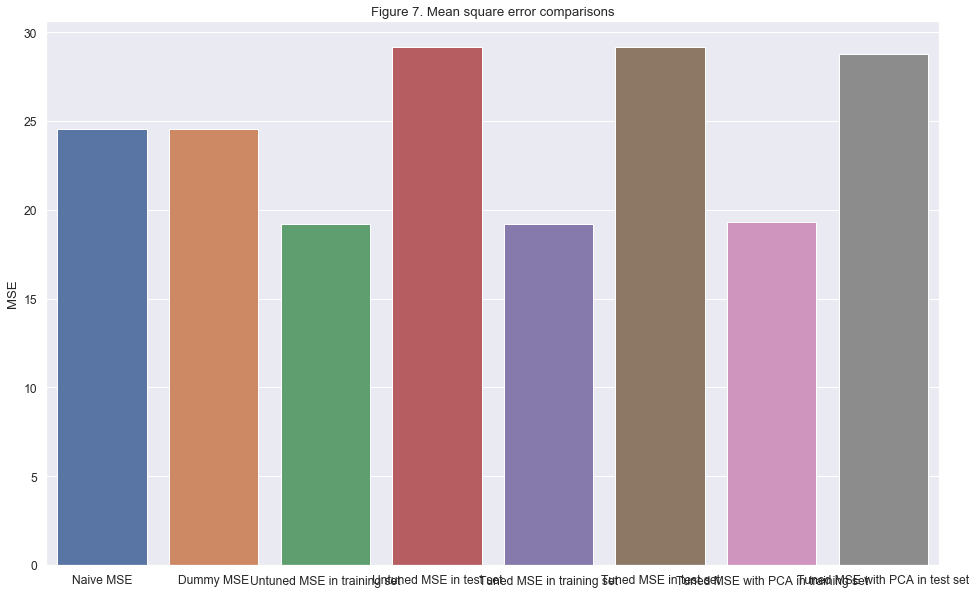

In [73]:
mse_data = pd.DataFrame([naive_MSE,MSE_dummy,MSE_train_untune,MSE_test_untune,MSE_train_tune,MSE_test_tune,MSE_PCA_train,MSE_PCA_test],index=["Naive MSE","Dummy MSE","Untuned MSE in training set","Untuned MSE in test set","Tuned MSE in training set","Tuned MSE in test set","Tuned MSE with PCA in training set","Tuned MSE with PCA in test set"])
#set the figure and font size
sns.set(rc={'figure.figsize':(16,10)},font_scale=1.1)
fig7 = sns.barplot(data = mse_data.reset_index(), x = 'index', y = 0)
fig7.set_title("Figure 7. Mean square error comparisons")
plt.ylabel("MSE")
plt.xlabel("")

Text(0.5, 0, '')

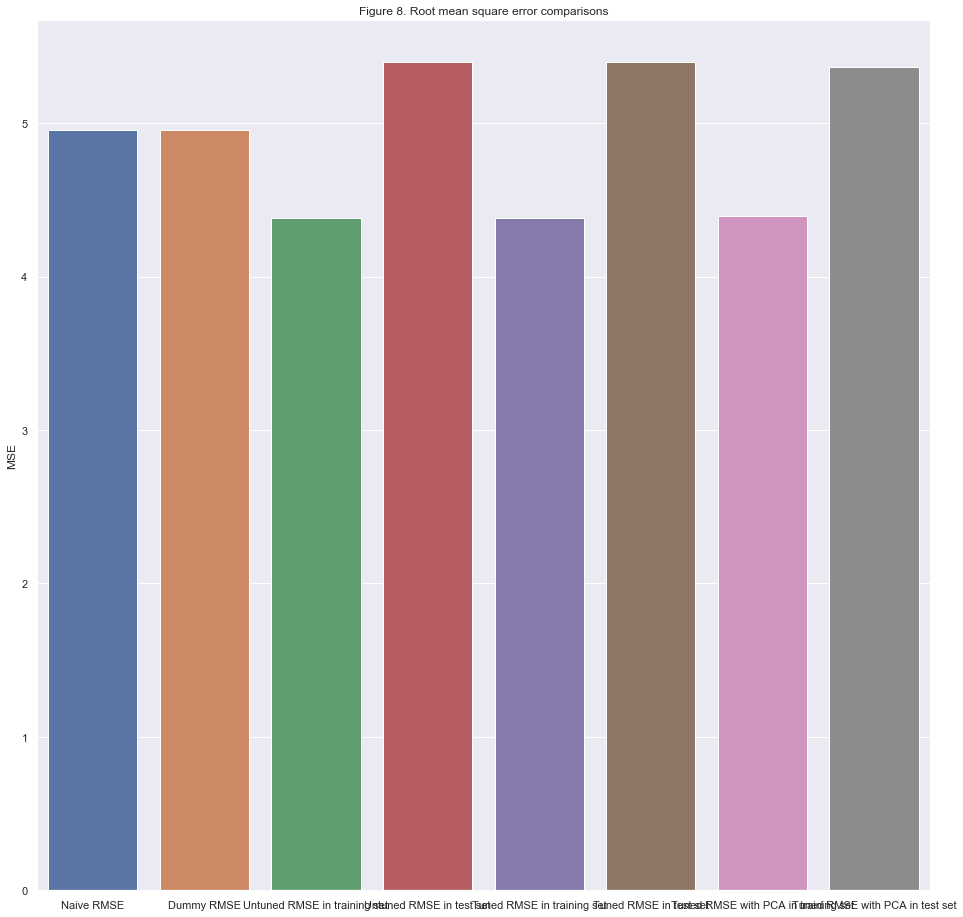

In [72]:
rmse_data = pd.DataFrame([naive_RMSE,RMSE_dummy,RMSE_train_untune,RMSE_test_untune,RMSE_train_tune,RMSE_test_tune,RMSE_PCA_train,RMSE_PCA_test],index=["Naive RMSE","Dummy RMSE","Untuned RMSE in training set","Untuned RMSE in test set","Tuned RMSE in training set","Tuned RMSE in test set", "Tuned RMSE with PCA in training set","Tuned RMSE with PCA in test set"])

fig8 = sns.barplot(data = rmse_data.reset_index(), x = 'index', y = 0)
fig8.set_title("Figure 8. Root mean square error comparisons")
plt.ylabel("MSE")
plt.xlabel("")

From the MSE and RMSE comparisons we can see that although the model is superior for the training set, it does not outperform the baseline metrics on the test set. It is therefore unlikley to be the best approach. The figures below (9 and 10) show the predicted values of G3 (final math score) against the true values. The model is likey vunerable to overfitting on this dataset.

Text(0.5, 0.98, 'Fig 9. True vs predicted data for untuned model')

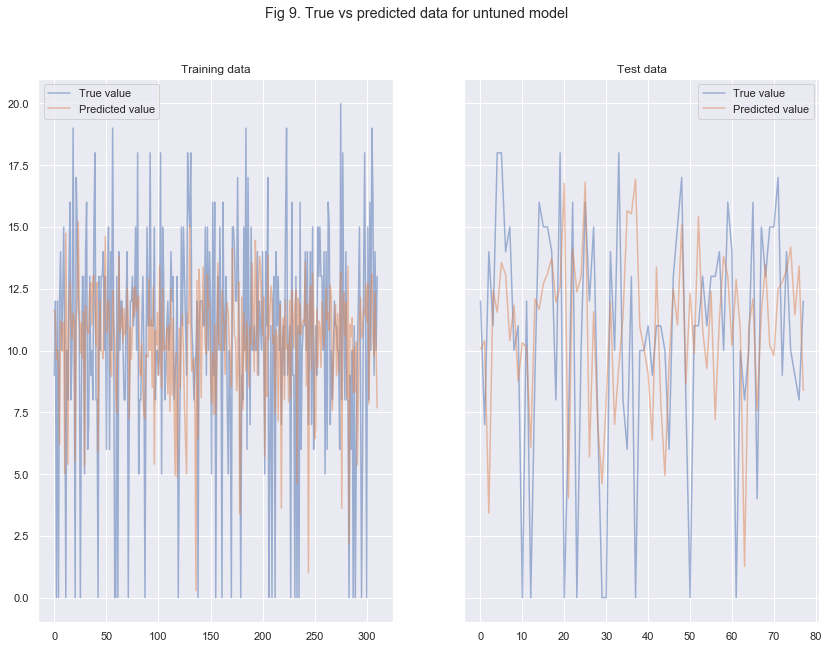

In [29]:
#set the figure and font size
sns.set(rc={'figure.figsize':(14,10)})
#create the main figure
fig9, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#create the first subplot
ax1.plot(values_train_untune['True'],alpha=0.5,label='True value')
ax1.plot(values_train_untune['Predicted'],alpha=0.5,label='Predicted value')
ax1.set_title('Training data')
ax1.legend()
#create the second subplot
ax2.plot(values_test_untune['True'],alpha=0.5,label='True value')
ax2.plot(values_test_untune['Predicted'],alpha=0.5,label='Predicted value')
ax2.set_title('Test data')
ax2.legend()
#add a figure title
fig9.suptitle('Fig 9. True vs predicted data for untuned model')

Text(0.5, 0.98, 'Fig 8. True vs predicted data for tuned model')

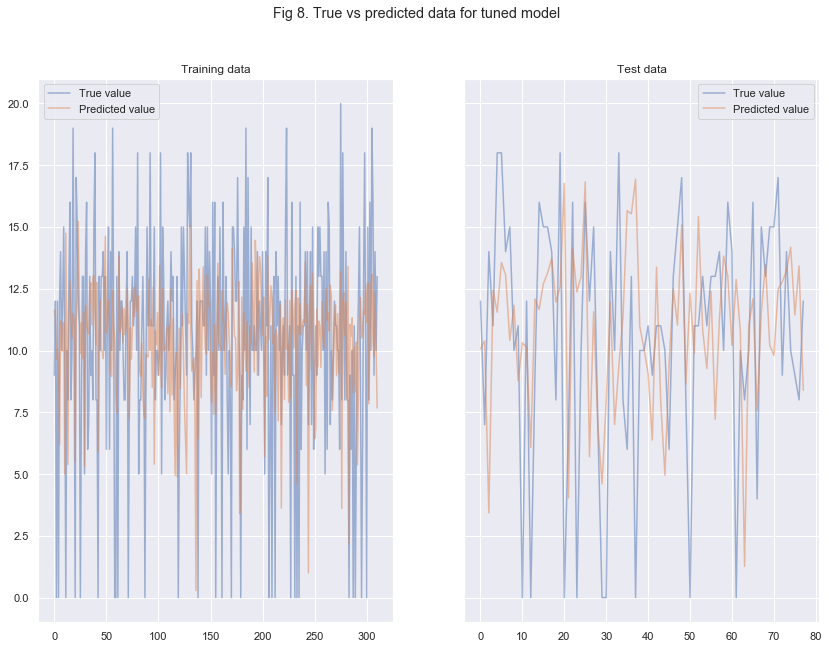

In [30]:
#set the figure and font size
sns.set(rc={'figure.figsize':(14,10)})
#create the main figure
fig10, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#create the first subplot
ax1.plot(values_train_tune['True'],alpha=0.5,label='True value')
ax1.plot(values_train_tune['Predicted'],alpha=0.5,label='Predicted value')
ax1.set_title('Training data')
ax1.legend()
#create the second subplot
ax2.plot(values_test_tune['True'],alpha=0.5,label='True value')
ax2.plot(values_test_tune['Predicted'],alpha=0.5,label='Predicted value')
ax2.set_title('Test data')
ax2.legend()
#add a figure title
fig10.suptitle('Fig 8. True vs predicted data for tuned model')

From the comparisons in figure 9 and 10, little difference can be seen in the patterns of predictions for the tuned and untuned models. The PCA did improve the model marginally, but it is still not the most accurate model.